In [1]:
import numpy as np 
import scipy as sc 
import matplotlib.pyplot as plt 
import math 
from scipy.io import loadmat 
from scipy import signal
import pandas as pd 
import seaborn as sns
from matplotlib import ticker

In [2]:
df = {
    'Temperature °C' : [
37.0045512717128,
37.1797785787142,
37.2341386554637,
37.2940725395483,
37.1926300116012,
37.1890909710035,
37.2413833329043,
37.2477736751745,
37.1246481590972,
36.2336463170549,
37.2277737486740,
37.4548999980488,
36.8351034423105,
37.3985986777714,
36.9234068994453,
37.2163154873533,
37.2456818223474,
37.2969241142009,
37.5457059648826,
37.3296820910488,
37.4563819855576,
37.3455528769296,
37.3093785890722,
37.2417780013492,
37.4232800332383,
37.2927564505192,
37.3030266303153,
37.2682443468409,
37.2948177648300,
37.2898108759812,
37.2438870332923,
37.1649977076945,
37.4967431059938,
37.1430636683320,
37.4338089119141,
37.2938992664873,
37.3065316417849,
37.6020809178464,
37.7240464198154,
37.3424005130293,
37.3607058538222,
37.5146871099110,
37.1013991081654,
37.4150367303088,
37.3482500542445,
37.2579620548685,
37.4208409217101,
37.3943440585508,
37.2523926630471,
37.1633451805715,
37.1350938728216,
37.2135981504981,
37.4559255266729,
37.2081230029703,
37.2523836379909,
37.0204250396135,
36.9597517918240,
35.5286395388475,
35.6044036273497,
35.3454786838425,
35.6517929468079,
36.6587636148754,
34.3176369662396,
35.3725684342377,
35.4958489783521,
34.7755733810006,
35.1142188491882,
37.1044034609727,
34.9315259462393,
34.8981262397181,
34.9180067046104,
34.9213275959204,
35.8026155521331,
35.2889392284205,
34.8240962154302,
36.1157860783465,
35.7612682150410,
35.6421858420178,
35.9716260065149,
35.1184029932562,
35.5015360258151,
35.8574849271809,
35.8080714433653,
35.5215905921168,
35.0711445344543,
36.2208629922875,
36.1098655246328,
36.3352537379572,
35.0429198135295,
36.3672040006611,
35.1533910279664,
37.0290277816005,
35.2233257869144,
35.5185907436316,
36.1106766666147,
36.1322253719683,
35.8680272612451,
36.0301175464654
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_temperature_light_day = pd.DataFrame(data = df)

In [3]:
df = {
    'Temperature °C' : [
        37.2593074817613, 37.5461378547099, 37.4515977352430,
            37.4759755937596, 37.4143193135372, 37.4499379975600,
            37.5804600281730, 37.4994564178066, 37.3507364584674,
        36.4077334769387, 37.8437909893384, 38.0959580249663,
            37.3082605521748, 38.0374631513809, 37.4237131818194,
            37.7334869956426, 37.7164414866705, 37.8618557761976,
        37.8660642564996, 37.7321884894907, 37.4349356411191,
            37.6272477613859, 37.7842254459941, 37.4416985486641,
            37.8582530882991, 37.7212903871332, 37.6631440284928,
            37.7086800363114, 37.7197843339512, 37.6943635636898,
            37.5803448450614, 37.5444743643380, 37.4475712136660,
            37.5468191634028, 37.7127643149339, 37.6852437958559,
        37.6616525157814, 37.7888558076694, 37.7397561797338,
            37.6501904798543, 37.8114042838892, 37.7374649275912,
37.4715704561154,
37.7616991026430,
37.5868565622463,
37.6855624723280,
37.7108228322002,
37.7404438903598,
37.5337468928440,
37.5820436380415,
37.3870088717921,
37.5015816961365,
37.7634818330555,
37.4805111779019,
37.6241714710213,
37.4004176145145,
36.9315786371813,
35.2781128381777,
35.5235673061253,
35.0964457170610,
35.5057128340831,
36.9985542423459,
34.4111519739181,
35.2973352662081,
35.3501735269122,
34.6118658501436,
35.1686771712083,
37.6050004176707,
34.8936374183830,
34.7808474354693,
35.1891885897702,
35.1738656746321,
35.5624771984392,
35.2057552733831,
34.8146601643725,
35.9284404520327,
35.8425656902958,
35.5647053933777,
36.1839296715534,
35.0183378969840,
35.5024446213551,
35.5515580788836,
35.2549790545060,
35.7836500748624,
35.0873334656889,
36.1122258864743,
36.1373522656806,
36.3900943350910,
34.8016926785895,
36.7260277263185,
34.8945699443263,
37.5186376741199,
35.1454401689756,
35.1087884962026,
35.9302955961428,
35.7808100914943,
35.6770826602846,
35.8698570325499
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
        "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
        "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
        "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
        "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
        "Dark","Dark","Dark",
            "Dark","Dark","Dark",
        "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark",
        "Dark","Dark","Dark",
            "Dark","Dark","Dark",
            "Dark","Dark","Dark"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_temperature_dark_day = pd.DataFrame(data = df)

In [4]:
df = {
    'Distance' : [
77134.5212957535,
75882.1839979602,
78059.5188473884,
68723.6122140705,
65072.6273980407,
68329.5102326533,
74700.4560662769,
73474.5356061489,
63199.3901960327,
14657.9541920913,
69377.8704725395,
59302.4988604134,
55539.2660818087,
67063.5817115171,
63077.0482123687,
62276.4356709783,
76433.0441284675,
63467.7686660768,
50813.0975880708,
63162.0708348294,
20599.8932186054,
65018.7567653988,
53140.1603901243,
41886.8536226025,
60346.8446593995,
59171.5688815224,
81598.9100866136,
54636.1724759433,
59640.1776520122,
63279.3239440470,
51538.3850240346,
61363.2386266635,
19412.5125326222,
73293.2529772855,
53085.0494177792,
39967.6716831381,
54113.0786824983,
56276.1361466965,
24266.9308258472,
85548.5567178168,
34932.4504578177,
78310.9145530711,
58503.1528489626,
64894.1652505740,
49091.8014026897,
62352.1028844372,
40600.2428001803,
48401.5987766969,
83534.4238782696,
74565.4610860296,
82219.6313474220,
93418.7093017240,
85056.1170514966,
86790.4628126633,
99141.5725182055,
78625.8434641710,
17858.0155965288,
54037.6059961554,
45012.7266078538,
41779.7847716457,
50879.3811868437,
55410.2889292709,
50057.2301053559,
54679.6683290999,
54401.6252692309,
48423.8435987973,
64761.6339709114,
61216.7634976451,
68133.4715208549,
60760.3402201490,
61238.0959352768,
58640.4208148995,
32820.6941042768,
50041.4708747955,
50899.9416046351,
48235.3942803543,
42807.8408360274,
42034.6706152121,
46185.5038025987,
39791.3894659494,
43985.5099442152,
35086.3970082877,
33252.5002765535,
35800.3609578400,
46068.3194553136,
43315.0238689225,
42511.6858388506,
47260.3708252817,
50670.3251424353,
16656.4018267941,
59598.9974622838,
63796.6533366481,
46706.0700005727,
47957.3203488631,
81365.4886810368,
57275.1192922304,
65854.4678090789,
51383.2223715932,
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light",
        "Light","Light","Light",
            "Light","Light","Light",
            "Light","Light","Light"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_distance_light_day = pd.DataFrame(data = df)

In [5]:
df = {
    'Distance' : [
135355.823715954,
132032.063507888,
122156.797224155,
104907.682012891,
98156.2517710401,
110019.461182103,
125627.674103752,
118954.644637546,
102681.649368188,
22846.0333305195,
159589.376337395,
163866.810379662,
132845.366331591,
173820.365468976,
146085.590569526,
142843.205463669,
162174.175729963,
144718.915675623,
96248.6327001504,
111481.215277924,
21703.2075178014,
109819.915055276,
97600.9146452007,
78078.8135198616,
109557.467686491,
107920.799193664,
142915.299266220,
104517.016821631,
126177.702566403,
130191.423499516,
87179.9788920410,
125560.878978352,
23233.7081447246,
136120.281748453,
87622.2608844731,
75405.3301843386,
101824.858430929,
93820.1621577459,
25291.1242429451,
150684.562887697,
74453.5566372478,
136240.768501002,
111449.710742453,
116332.859779562,
91911.0698246768,
116515.918633320,
72222.3326850643,
100313.960347039,
151559.538799209,
151341.448739778,
164246.166594166,
218879.925100324,
150083.035150429,
164519.096885139,
194737.344639775,
216393.225672644,
26830.9177623293,
79619.8270044066,
53860.2271035520,
67840.9165330058,
61710.0801443608,
90051.3021176200,
80666.8979547455,
75192.8640539439,
81208.2913322377,
58777.5063978158,
127902.545162702,
126315.769781110,
118749.622969393,
135206.589318143,
142286.582872818,
124790.193424588,
63623.1029537762,
92005.2042292885,
81053.7007030902,
99530.3733851997,
92061.0429112372,
69294.0904668921,
78144.5401627261,
78565.3210148089,
76216.1502972863,
76221.3452533615,
63365.6225571105,
55511.2249343866,
69882.6409621281,
74931.4502465390,
82089.6153105730,
65797.5029280891,
92729.3292799475,
23368.7132540666,
109937.198672711,
118919.742089501,
94895.0860772405,
94496.0753410496,
129455.405807837,
108333.118261711,
125158.102451136,
107382.025792988,
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_distance_dark_day = pd.DataFrame(data = df)

In [6]:
df = {
    'Drinking' : [
30.5200000000000,
32.0933333333333,
49.0400000000000,
57.8133333333333,
54.1733333333333,
50.8266666666667,
40.2666666666667,
35.3466666666667,
37.0266666666667,
63.6666666666667,
58.9466666666667,
98.6666666666667,
45.6933333333333,
51.5066666666667,
121.373333333333,
106.853333333333,
119.066666666667,
72.7066666666667,
233.906666666667,
205.226666666667,
112.133333333333,
292.200000000000,
153.613333333333,
97.7466666666667,
173.106666666667,
228.093333333333,
239.373333333333,
155.400000000000,
270.600000000000,
241.506666666667,
203.586666666667,
170.253333333333,
151.306666666667,
264.906666666667,
264.093333333333,
87.2266666666667,
267.666666666667,
278.120000000000,
89.1866666666667,
195.906666666667,
82.8933333333333,
295.306666666667,
125.946666666667,
269.106666666667,
96.2133333333333,
142.520000000000,
95.5066666666667,
110.013333333333,
176.373333333333,
260.586666666667,
249.853333333333,
383.480000000000,
237.426666666667,
194.160000000000,
220.986666666667,
327.573333333333,
13.3733333333333,
33.6533333333333,
80.1333333333333,
105.760000000000,
86.9466666666667,
123.666666666667,
129.573333333333,
42.9866666666667,
33.9866666666667,
129.773333333333,
128.266666666667,
89.1733333333333,
103.586666666667,
90.5333333333333,
63.8000000000000,
163.693333333333,
154,
125.826666666667,
82.1600000000000,
271.266666666667,
97.1466666666667,
65.2800000000000,
113.960000000000,
285.400000000000,
249.600000000000,
160.440000000000,
89.5466666666667,
129.466666666667,
153.973333333333,
78.8533333333333,
35.1333333333333,
221.293333333333,
215.280000000000,
180.880000000000,
219.120000000000,
25.5200000000000,
178.453333333333,
33.8266666666667,
151.586666666667
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_drinking_light_day = pd.DataFrame(data = df)

In [7]:
df = {
    'Drinking' : [
139.893333333333,
83.4133333333333,
145.746666666667,
167.280000000000,
173.586666666667,
181.813333333333,
150.093333333333,
98.0133333333333,
98.9066666666667,
99.0666666666667,
201.746666666667,
291.613333333333,
172.426666666667,
201.533333333333,
314.920000000000,
328.333333333333,
322.360000000000,
284.720000000000,
539.520000000000,
424.746666666667,
102.746666666667,
581.826666666667,
438.693333333333,
264.906666666667,
594.893333333333,
563.186666666667,
432.720000000000,
356.386666666667,
713.146666666667,
652.413333333333,
415.240000000000,
499.546666666667,
112.320000000000,
603.906666666667,
514.400000000000,
212.373333333333,
583.586666666667,
567.826666666667,
87.6400000000000,
437.880000000000,
200.666666666667,
678.973333333333,
346.080000000000,
625.120000000000,
194.706666666667,
287.466666666667,
228.906666666667,
271.666666666667,
611.400000000000,
654.893333333333,
876.453333333333,
982.560000000000,
715.600000000000,
634.360000000000,
731.800000000000,
814.026666666667,
31.5600000000000,
85.1733333333333,
112.920000000000,
303.853333333333,
117.520000000000,
293.440000000000,
328.493333333333,
91.4666666666667,
77.6800000000000,
198.426666666667,
366.666666666667,
246.506666666667,
353.680000000000,
373.760000000000,
174.186666666667,
318.426666666667,
636.813333333333,
504.546666666667,
228.386666666667,
479.040000000000,
231.346666666667,
166.226666666667,
447.813333333333,
461.693333333333,
489.293333333333,
368.453333333333,
231.520000000000,
379.986666666667,
333.706666666667,
159.880000000000,
25.9600000000000,
570.146666666667,
708.280000000000,
613.266666666667,
622.680000000000,
17.2533333333333,
709.800000000000,
23.2533333333333,
508.533333333333
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_drinking_dark_day = pd.DataFrame(data = df)

In [8]:
df = {
    'Socialinteraction' : [
0.551176140775798,
0.551771233071022,
0.545597058637201,
0.540316393368386,
0.553438398809882,
0.570055592795993,
0.559269726083103,
0.567093776378622,
0.558334762108893,
0.503726567958506,
0.462268643604846,
0.497639679261029,
0.457131019861353,
0.456173122519810,
0.501182202834565,
0.417316609920127,
0.424643496505236,
0.401264882800555,
0.499446868842225,
0.527183061569746,
0.510216469817793,
0.538689566248657,
0.541775909619160,
0.543045738998561,
0.546948564859313,
0.504909418833789,
0.511390659141027,
0.547727694468481,
0.545902031311585,
0.535556001828708,
0.502758755656652,
0.558554397530232,
0.530373753488468,
0.546875930196464,
0.531183830254764,
0.535264592230878,
0.541644021851948,
0.545586409470535,
0.504341188318047,
0.489561968908644,
0.530643737816916,
0.510173880369237,
0.555523060270888,
0.539821954235227,
0.569075353594602,
0.553880830233018,
0.550995781267764,
0.556717458205646,
0.505371934098200,
0.620234304637555,
0.636205650283479,
0.542679208502122,
0.520298425184058,
0.512392069594090,
0.524709956667731,
0.553152694358916,
0.612662978665201,
0.444098207296975,
0.486690187650450,
0.464454434131026,
0.484279854769153,
0.462010941483767,
0.443139192759925,
0.435901599631107,
0.427773930467801,
0.480564079823100,
0.407671165162857,
0.376011148465338,
0.414834067065232,
0.417633648387085,
0.423651256077204,
0.416076821114756,
0.571100546065105,
0.471548849374013,
0.457714619347478,
0.487189832194889,
0.494320379282633,
0.443609723735862,
0.492779625293123,
0.473154001895261,
0.469476142622773,
0.566496489598099,
0.501607871084941,
0.489863615193427,
0.452920932848462,
0.470819034707954,
0.471944988400411,
0.450357579501294,
0.502733672465726,
0.534101326109435,
0.503451597046896,
0.511173129578978,
0.503944470804674,
0.498080180713330,
0.506574448845057,
0.492576805552095,
0.526794170353916,
0.506790232651354
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_socialinteraction_light_day = pd.DataFrame(data = df)

In [9]:
df = {
    'Socialinteraction' : [
        0.504781517301595,
0.505985474422210,
0.534343759043631,
0.523738935169108,
0.529420771437322,
0.524076016955878,
0.514135142457557,
0.523866703552902,
0.514102803891909,
0.515357525472107,
0.476563728557972,
0.516342680776411,
0.465203301238008,
0.464075281526828,
0.510849127447253,
0.472067195467875,
0.472197655154609,
0.469194240366835,
0.512245481606887,
0.528070661445040,
0.510746928868210,
0.526828159040399,
0.527658124488279,
0.521160457145194,
0.501493636290912,
0.523621109101022,
0.497909188138142,
0.551249402829383,
0.524485756707367,
0.535682683395927,
0.529467094646904,
0.535422779791407,
0.529544110945563,
0.529176853460532,
0.528264925281673,
0.522171761432780,
0.561723197248310,
0.554493650176384,
0.503285085666047,
0.475097139598850,
0.532538065221467,
0.492796610239926,
0.532024611570989,
0.567891694193923,
0.517404621193818,
0.546594613022640,
0.535890342064666,
0.520906138063683,
0.443139486773877,
0.577816967674658,
0.582479369884820,
0.459953920796519,
0.462998333875138,
0.457654392698553,
0.475987856786117,
0.481072126202965,
0.567654076145494,
0.461286590437554,
0.493632175161429,
0.478117369940890,
0.494218728312989,
0.474118160100733,
0.465420650921783,
0.455302827065858,
0.453759836898342,
0.486178716325196,
0.452969734760093,
0.451541000256004,
0.467976276394917,
0.470442584600078,
0.464299686720654,
0.464431173975716,
0.523916822558610,
0.452056116401578,
0.477558357029421,
0.467883465741783,
0.469060525748564,
0.459633305190412,
0.474084096022216,
0.454500631664875,
0.468809416261837,
0.530588142914329,
0.476864581866063,
0.471571319660610,
0.472613409631543,
0.459502350057190,
0.463249935112776,
0.474747784022567,
0.441719661851318,
0.521846309384389,
0.439009256081264,
0.440231101886064,
0.433719150715576,
0.446779784545512,
0.488533833358173,
0.438026534243105,
0.509406076905512,
0.436981965842725
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_socialinteraction_dark_day = pd.DataFrame(data = df)

In [21]:
df = {
    'Velocity' : [
0.00178736803388358,
0.00168948053874946,
0.00173365446480520,
0.00151619240392137,
0.00143390022234948,
0.00150194558628638,
0.00164689736251719,
0.00163214587305063,
0.00141385597968394,
0.00137524631022103,
0.00152880042462473,
0.00129373601252266,
0.00122184423561583,
0.00147164205100931,
0.00139224399255616,
0.00134849699185797,
0.00168642486437888,
0.00137421969160350,
0.00113821500766935,
0.00140236850251283,
0.00227028030511051,
0.00144524993524827,
0.00151092787717133,
0.00178000143471450,
0.00172386989397239,
0.00133578047341410,
0.00180076649040081,
0.00150917979425750,
0.00131212054700757,
0.00139172709604485,
0.00116355410079407,
0.00174900454873335,
0.00213121155535665,
0.00161612221620701,
0.00118220182687524,
0.00172722770660368,
0.00119805084078717,
0.00125644182744189,
0.00269525728451222,
0.00189399552982945,
0.00149124871485874,
0.00172795829779095,
0.00160532867134112,
0.00144392681855525,
0.00210990049625572,
0.00172168961201375,
0.00172470891402580,
0.00206615435480999,
0.00192023813963827,
0.00169380825377503,
0.00185933009930847,
0.00209580235412015,
0.00189791050104824,
0.00195043701838217,
0.00223203622088350,
0.00176730845522705,
0.00232006410441537,
0.00134032148659399,
0.00106178595498561,
0.000962421674662906,
0.00117097637950726,
0.00131390871612886,
0.00119502910264534,
0.00137625847559950,
0.00134953320894820,
0.00114089039581819,
0.00149523087581196,
0.00142355165538939,
0.00157973453806959,
0.00137482248394145,
0.00138674901154559,
0.00132476065741198,
0.000945256925240063,
0.00162096230255055,
0.00152692622170132,
0.00128986135329673,
0.00114441630789935,
0.00125490205109531,
0.00167402835465151,
0.00126999943984907,
0.00131450153224128,
0.00100049605619163,
0.00122272402107340,
0.00130285730851924,
0.00139907208703724,
0.00144526130061857,
0.00112934651421925,
0.00142803428254640,
0.00159053588527090,
0.00135798262920689,
0.00147538026085253,
0.00105423900674395,
0.00108470993635426,
0.00181895337434455,
0.00131898808686158,
0.00147020951884283,
0.00115729925153116
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
        "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light","light","light",
            "light",
        "light","light","light",
            "light","light","light",
            "light","light","light"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_velocity_light_day = pd.DataFrame(data = df)

In [22]:
df = {
    'Velocity' : [
0.00325280463342470,
0.00292758597764555,
0.00278792571809941,
0.00236168919758331,
0.00222562045710941,
0.00248856063951344,
0.00284656167436180,
0.00262400779607427,
0.00225450179334476,
0.00221657871382142,
0.00355592805971972,
0.00356916578713330,
0.00295133384824808,
0.00385917442667448,
0.00326204429518322,
0.00313657533512118,
0.00363820219833572,
0.00318720321929675,
0.00217181640728269,
0.00244090428651359,
0.00247427777329358,
0.00241837503350639,
0.00273445978209112,
0.00330517097186244,
0.00305909167571272,
0.00244653430209930,
0.00319343226311385,
0.00284613536230791,
0.00275379506252029,
0.00286809872227379,
0.00198533466884001,
0.00351911510591257,
0.00263729880212402,
0.00300289092910978,
0.00193528544738774,
0.00320180572917812,
0.00226110521363427,
0.00208791489853832,
0.00288553947644745,
0.00336377084107162,
0.00314157217519579,
0.00303183152406865,
0.00302987752342524,
0.00258864958483402,
0.00389049085331180,
0.00317445990397064,
0.00305588671011051,
0.00426534937626977,
0.00350957087489066,
0.00339789597307215,
0.00367812376110395,
0.00486188743348204,
0.00330817679784161,
0.00364025142421032,
0.00429206180644930,
0.00479125949773686,
0.00320854269406973,
0.00201391195964766,
0.00124055148175193,
0.00158470358655725,
0.00138860058584605,
0.00212216439989136,
0.00188423834715626,
0.00191430936249513,
0.00205871592490948,
0.00132657596029963,
0.00290791840574792,
0.00288078674857340,
0.00269747638819839,
0.00298804167159087,
0.00316407233694522,
0.00277051656134637,
0.00180328861699747,
0.00284987759837784,
0.00243304102465450,
0.00264208788049022,
0.00244609080879233,
0.00203311358769525,
0.00276743724355442,
0.00242510359450915,
0.00225362854771270,
0.00217162207734355,
0.00224133347021540,
0.00196307958095948,
0.00211635845182710,
0.00231550933229403,
0.00217235737984699,
0.00198139573834127,

0.00231247613947732,
0.00256965918906501,
0.00281733806206237,
0.00213923131680107,
0.00213265539784360,
0.00290940406670401,
0.00250557420590214,
0.00281345180456433,
0.00241712074551937
    ],
    'Gender' : [
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Female","Female","Female",
            "Female","Female","Female",
            "Female","Female","Female",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male",
            "Male",
        "Male","Male","Male",
            "Male","Male","Male",
            "Male","Male","Male"

    ],
    'Time scale' : [
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily",
        "Daily","Daily","Daily",
            "Daily","Daily","Daily",
            "Daily","Daily","Daily"
    ],
    'State' : [
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark",
            "dark",
        "dark","dark","dark",
            "dark","dark","dark",
            "dark","dark","dark"
    ],
    'Strain' : [
                "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
        "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
            "Lister Hooded","Lister Hooded","Lister Hooded",
        "Long Evans","Long Evans","Long Evans",
            "Long Evans","Long Evans","Long Evans",
        "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley","Sprague Dawley","Sprague Dawley",
            "Sprague Dawley",
        "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar",
            "Wistar","Wistar","Wistar"
    ]
}
df_velocity_dark_day = pd.DataFrame(data = df)

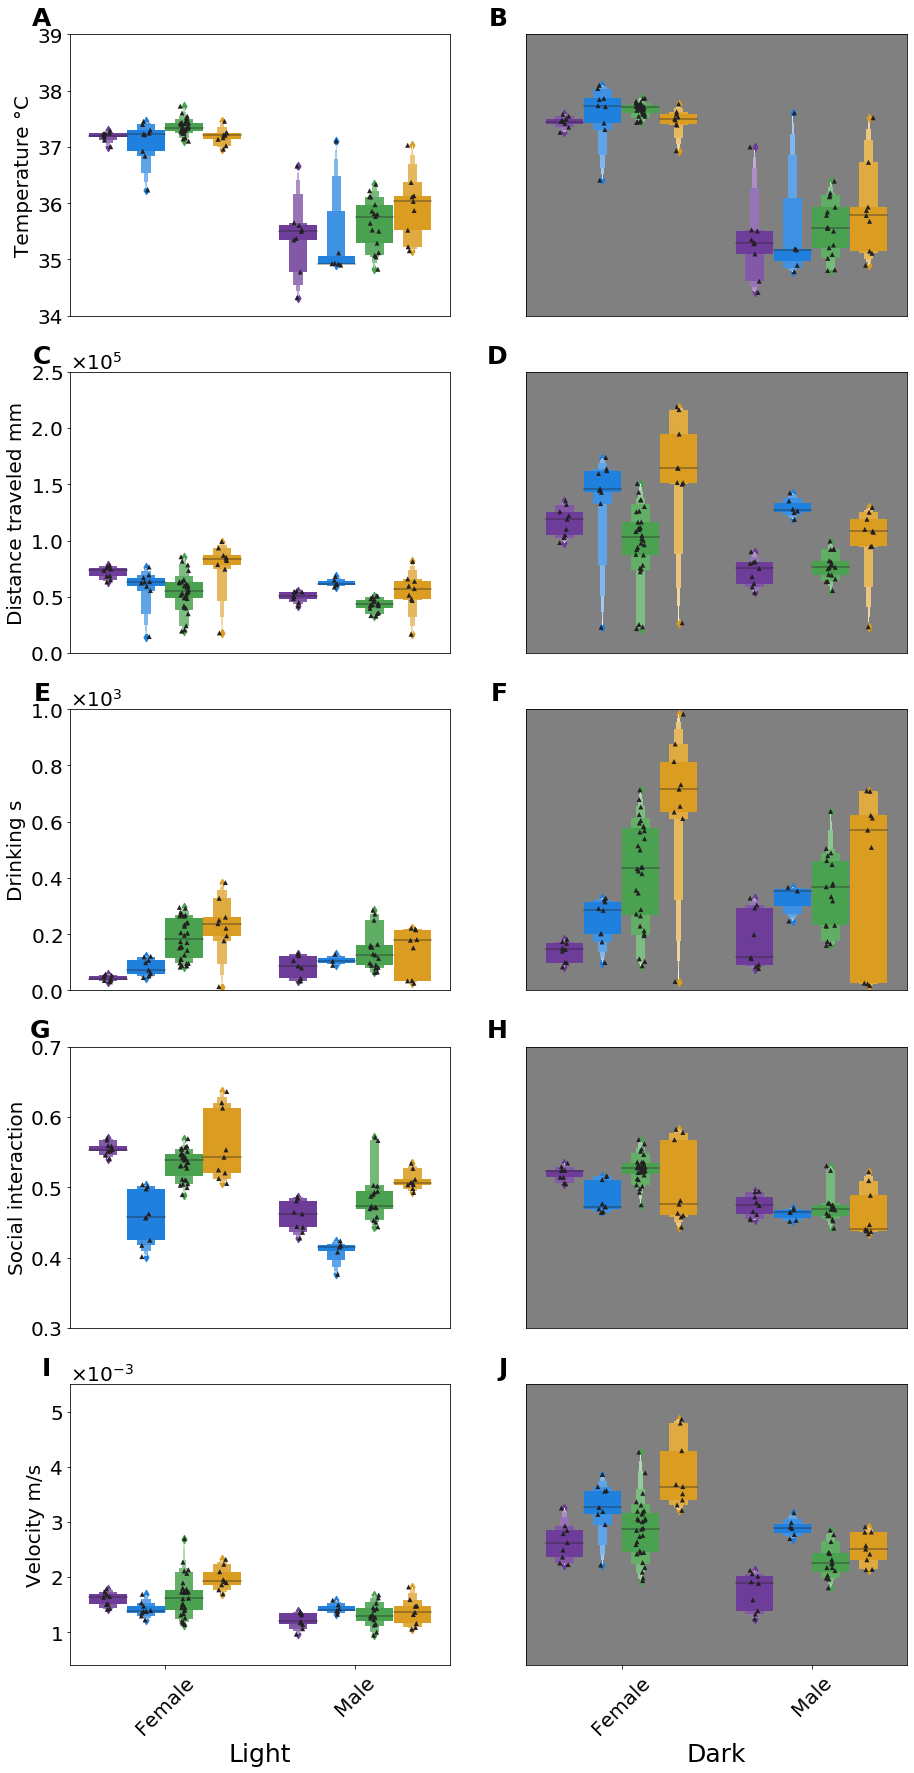

In [23]:
size = 20
sizee = 25
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))

#sns.set(font_scale = 1.4)
#sns.set_style("whitegrid", {'axes.grid' : False})
axes[0,0].get_shared_y_axes().join(axes[0,1])
axes[1,0].get_shared_y_axes().join(axes[1,1])



#axes[0,0].set_axis_bgcolor('white')
sns.catplot(x= "Gender", y = "Temperature °C", hue="Strain", kind= "boxen",
                    data=df_temperature_light_day, 
                   palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                ax=axes[0,0])
sns.stripplot(x= "Gender", y = "Temperature °C", 
                    hue = "Strain", data=df_temperature_light_day, s = 5, marker = '^',
              palette = sns.color_palette(["#222021"], n_colors=1)
              ,jitter=True, ax=axes[0,0], dodge=True)


axes[0,0].set_xlabel('')
axes[0,0].set_ylim([34, 39])
axes[0,0].set_ylabel("Temperature °C",size=size)
axes[0,0].set_xticks([])
#axes[0,0].set_ylabel('Cross correlation coefficient',fontsize=size)

axes[0,1].set_facecolor('grey')
sns.catplot(x= "Gender", y = "Temperature °C", hue="Strain", kind= "boxen",
                    data=df_temperature_dark_day, 
                       palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                    ax=axes[0,1])
sns.stripplot(x= "Gender", y = "Temperature °C", 
                        hue = "Strain", data=df_temperature_dark_day, s = 5,  marker = '^',
                  palette = sns.color_palette(["#222021"], n_colors=1)
                  ,jitter=True, ax=axes[0,1], dodge=True)


axes[0,1].set_ylim([34, 39])
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')
axes[0,1].set_yticks([])
axes[0,1].set_xticks([])
axes[0,0].legend_.remove()
axes[0,1].legend_.remove()
axes[0,0].tick_params(axis ='both',which = 'both',labelsize=size)
axes[0,1].tick_params(axis ='both',which = 'both',labelsize=size)

#sns.set_style("whitegrid", {'axes.grid' : False})

axes[0,0].text(-0.05, 1.10, 'A', transform=axes[0,0].transAxes,
      fontsize=sizee, fontweight='bold', va='top', ha='right')
axes[0,1].text(-0.05, 1.10, 'B', transform=axes[0,1].transAxes,
      fontsize=sizee, fontweight='bold', va='top', ha='right')
tl = axes[1,0].get_xticklabels()
axes[1,0].set_xticklabels(tl, rotation=45)
#fig.text(0.04, 0.82, 'Temperature °C', va='center', rotation='vertical', fontsize = sizee)
tl = axes[0,0].get_yticklabels()
#axes[0,0].set_yticklabels(tl, rotation=45)
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# #formatter.set_fontsize(size)
# formatter.set_powerlimits((-1,1)) 
# axes[0,0].yaxis.set_major_formatter(formatter)
plt.close()
plt.close()




#sns.set(font_scale = 1.4)
#sns.set_style("whitegrid", {'axes.grid' : False})
axes[1,0].get_shared_y_axes().join(axes[1,1])
axes[1,0].get_shared_y_axes().join(axes[1,1])



#axes[1,0].set_axis_bgcolor('white')
sns.catplot(x= "Gender", y = "Distance", hue="Strain", kind= "boxen",
                    data=df_distance_light_day, palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                    ax=axes[1,0])
sns.stripplot(x= "Gender", y = "Distance", 
                    hue = "Strain", data=df_distance_light_day, s = 5, marker = '^',
                      palette = sns.color_palette(["#222021"], n_colors=1)
                      ,jitter=True, ax=axes[1,0], dodge=True)


axes[1,0].set_xlabel('')
axes[1,0].set_ylim([0, 250000])
axes[1,0].set_ylabel("Distance traveled mm",size=size)
axes[1,0].set_xticks([])
#axes[1,0].set_ylabel('Cross correlation coefficient',fontsize=size)

axes[1,1].set_facecolor('grey')
sns.catplot(x= "Gender", y = "Distance", hue="Strain", kind= "boxen",
                    data=df_distance_dark_day, palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                    ax=axes[1,1])
sns.stripplot(x= "Gender", y = "Distance", 
                        hue = "Strain", data=df_distance_dark_day, s = 5,  marker = '^',
                          palette = sns.color_palette(["#222021"], n_colors=1)
                          ,jitter=True, ax=axes[1,1], dodge=True)


axes[1,1].set_ylim([0, 250000])
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('')
axes[1,1].set_yticks([])
axes[1,1].set_xticks([])
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[1,0].tick_params(axis ='both',which = 'both',labelsize=size)
axes[1,1].tick_params(axis ='both',which = 'both',labelsize=size)

#sns.set_style("whitegrid", {'axes.grid' : False})

axes[1,0].text(-0.05, 1.10, 'C', transform=axes[1,0].transAxes,fontsize=sizee, fontweight='bold', va='top', ha='right')
axes[1,1].text(-0.05, 1.10, 'D', transform=axes[1,1].transAxes,fontsize=sizee, fontweight='bold', va='top', ha='right')
tl = axes[1,0].get_xticklabels()
axes[1,0].set_xticklabels(tl, rotation=45)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
#formatter.set_fontsize(size)
formatter.set_powerlimits((-1,1)) 
axes[1,0].yaxis.set_major_formatter(formatter)
axes[1,0].yaxis.get_offset_text().set_fontsize(size)
plt.close()
plt.close()




#sns.set(font_scale = 1.4)
#sns.set_style("whitegrid", {'axes.grid' : False})
axes[2,0].get_shared_y_axes().join(axes[2,1])
axes[2,0].get_shared_y_axes().join(axes[2,1])



#axes[2,0].set_axis_bgcolor('white')
sns.catplot(x= "Gender", y = "Drinking", hue="Strain", kind= "boxen",
                    data=df_drinking_light_day, palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                    ax=axes[2,0])
sns.stripplot(x= "Gender", y = "Drinking", 
                    hue = "Strain", data=df_drinking_light_day, s = 5, marker = '^',
                      palette = sns.color_palette(["#222021"], n_colors=1)
                      ,jitter=True, ax=axes[2,0], dodge=True)


axes[2,0].set_xlabel('')
axes[2,0].set_ylim([0, 1000])
axes[2,0].set_ylabel("Drinking s",size=size)
axes[2,0].set_xticks([])
#axes[2,0].set_ylabel('Cross correlation coefficient',fontsize=size)

axes[2,1].set_facecolor('grey')
sns.catplot(x= "Gender", y = "Drinking", hue="Strain", kind= "boxen",
                    data=df_drinking_dark_day, palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                    ax=axes[2,1])
sns.stripplot(x= "Gender", y = "Drinking", 
                        hue = "Strain", data=df_drinking_dark_day, s = 5,  marker = '^',
                          palette = sns.color_palette(["#222021"], n_colors=1)
                          ,jitter=True, ax=axes[2,1], dodge=True)


axes[2,1].set_ylim([0, 1000])
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('')
axes[2,1].set_yticks([])
axes[2,1].set_xticks([])
axes[2,0].legend_.remove()
axes[2,1].legend_.remove()
axes[2,0].tick_params(axis ='both',which = 'both',labelsize=size)
axes[2,1].tick_params(axis ='both',which = 'both',labelsize=size)

#sns.set_style("whitegrid", {'axes.grid' : False})

axes[2,0].text(-0.05, 1.10, 'E', transform=axes[2,0].transAxes,fontsize=sizee, fontweight='bold', va='top', ha='right')
axes[2,1].text(-0.05, 1.10, 'F', transform=axes[2,1].transAxes,fontsize=sizee, fontweight='bold', va='top', ha='right')

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
#formatter.set_fontsize(size)
formatter.set_powerlimits((-1,1)) 

axes[2,0].yaxis.set_major_formatter(formatter)
axes[2,0].yaxis.get_offset_text().set_fontsize(size)
plt.close()
plt.close()



#sns.set(font_scale = 1.4)
#sns.set_style("whitegrid", {'axes.grid' : False})
axes[3,0].get_shared_y_axes().join(axes[3,1])
axes[3,0].get_shared_y_axes().join(axes[3,1])



#axes[3,0].set_axis_bgcolor('white')
sns.catplot(x= "Gender", y = "Socialinteraction", hue="Strain", kind= "boxen",
                    data=df_socialinteraction_light_day, palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                    ax=axes[3,0])
sns.stripplot(x= "Gender", y = "Socialinteraction", 
                    hue = "Strain", data=df_socialinteraction_light_day, s = 5, marker = '^',
                      palette = sns.color_palette(["#222021"], n_colors=1)
                      ,jitter=True, ax=axes[3,0], dodge=True)


axes[3,0].set_xlabel('')
axes[3,0].set_ylim([0.3, 0.7])
axes[3,0].set_ylabel("Social interaction",size=size)
axes[3,0].set_xticks([])
#axes[3,0].set_ylabel('Cross correlation coefficient',fontsize=size)

axes[3,1].set_facecolor('grey')
sns.catplot(x= "Gender", y = "Socialinteraction", hue="Strain", kind= "boxen",
                    data=df_socialinteraction_dark_day, palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                    ax=axes[3,1])
sns.stripplot(x= "Gender", y = "Socialinteraction", 
                        hue = "Strain", data=df_socialinteraction_dark_day, s = 5,  marker = '^',
                          palette = sns.color_palette(["#222021"], n_colors=1)
                          ,jitter=True, ax=axes[3,1], dodge=True)


axes[3,1].set_ylim([0.3, 0.7])
axes[3,1].set_ylabel('')
axes[3,1].set_xlabel('')
axes[3,1].set_yticks([])
axes[3,1].set_xticks([])
axes[3,0].legend_.remove()
axes[3,1].legend_.remove()
axes[3,0].tick_params(axis ='both',which = 'both',labelsize=size)
axes[3,1].tick_params(axis ='both',which = 'both',labelsize=size)

#sns.set_style("whitegrid", {'axes.grid' : False})

axes[3,0].text(-0.05, 1.10, 'G', transform=axes[3,0].transAxes,fontsize=sizee, fontweight='bold', va='top', ha='right')
axes[3,1].text(-0.05, 1.10, 'H', transform=axes[3,1].transAxes,fontsize=sizee, fontweight='bold', va='top', ha='right')
#tl = axes[3,0].get_xticklabels()
#axes[3,0].set_xticklabels(tl, rotation=45)
#tl = axes[3,1].get_xticklabels()
#axes[3,1].set_xticklabels(tl, rotation=45)
#axes[3,0].set_xlabel("Light",size=size)
#axes[3,1].set_xlabel("Dark",size=size)


# tl = axes[1,0].get_yticklabels()
# axes[1,0].set_yticklabels(tl, rotation=45)
# tl = axes[2,0].get_yticklabels()
# axes[2,0].set_yticklabels(tl, rotation=45)
# tl = axes[3,0].get_yticklabels()
# axes[3,0].set_yticklabels(tl, rotation=45)





plt.close()
plt.close()


# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# #formatter.set_fontsize(size)
# formatter.set_powerlimits((-1,1)) 
# axes[3,0].yaxis.set_major_formatter(formatter)



#sns.set(font_scale = 1.4)
#sns.set_style("whitegrid", {'axes.grid' : False})
axes[4,0].get_shared_y_axes().join(axes[4,1])
axes[4,0].get_shared_y_axes().join(axes[4,1])



#axes[4,0].set_axis_bgcolor('white')
sns.catplot(x= "Gender", y = "Velocity", hue="Strain", kind= "boxen",
                    data=df_velocity_light_day, palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                    ax=axes[4,0])
sns.stripplot(x= "Gender", y = "Velocity", 
                    hue = "Strain", data=df_velocity_light_day, s = 5, marker = '^',
                      palette = sns.color_palette(["#222021"], n_colors=1)
                      ,jitter=True, ax=axes[4,0], dodge=True)


#axes[4,0].set_xlabel('')
axes[4,0].set_ylim([0.0004, 0.0055])
axes[4,0].set_ylabel("Velocity m/s",size=size)
#axes[4,0].set_xticks([])
#axes[4,0].set_ylabel('Cross correlation coefficient',fontsize=size)

axes[4,1].set_facecolor('grey')
sns.catplot(x= "Gender", y = "Velocity", hue="Strain", kind= "boxen",
                    data=df_velocity_dark_day, palette = sns.color_palette(["#6F2DA8","#0080FE","#3BB143","#F9A602"], n_colors=4),
                    ax=axes[4,1])
sns.stripplot(x= "Gender", y = "Velocity", 
                        hue = "Strain", data=df_velocity_dark_day, s = 5,  marker = '^',
                          palette = sns.color_palette(["#222021"], n_colors=1)
                          ,jitter=True, ax=axes[4,1], dodge=True)


axes[4,1].set_ylim([0.0004, 0.0055])
axes[4,1].set_ylabel('')
#axes[4,1].set_xlabel('')
axes[4,1].set_yticks([])
#axes[4,1].set_xticks([])
axes[4,0].legend_.remove()
axes[4,1].legend_.remove()
axes[4,0].tick_params(axis ='both',which = 'both',labelsize=size)
axes[4,1].tick_params(axis ='both',which = 'both',labelsize=size)

#sns.set_style("whitegrid", {'axes.grid' : False})

axes[4,0].text(-0.05, 1.10, 'I', transform=axes[4,0].transAxes,fontsize=sizee, fontweight='bold', va='top', ha='right')
axes[4,1].text(-0.05, 1.10, 'J', transform=axes[4,1].transAxes,fontsize=sizee, fontweight='bold', va='top', ha='right')
tl = axes[4,0].get_xticklabels()
axes[4,0].set_xticklabels(tl, rotation=45)
tl = axes[4,1].get_xticklabels()
axes[4,1].set_xticklabels(tl, rotation=45)
axes[4,0].set_xlabel("Light",size=sizee)
axes[4,1].set_xlabel("Dark",size=sizee)


# tl = axes[1,0].get_yticklabels()
# axes[1,0].set_yticklabels(tl, rotation=45)
# tl = axes[2,0].get_yticklabels()
# axes[2,0].set_yticklabels(tl, rotation=45)
# tl = axes[4,0].get_yticklabels()
# axes[4,0].set_yticklabels(tl, rotation=45)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
#formatter.set_fontsize(size)
formatter.set_powerlimits((-1,1)) 

axes[4,0].yaxis.set_major_formatter(formatter)
axes[4,0].yaxis.get_offset_text().set_fontsize(size)



plt.close()
plt.close()

plt.savefig("boxen_f1.jpg", bbox_inches='tight' , dpi = 900)


<Figure size 432x288 with 0 Axes>

In [ ]:
sns.catplot(x= "Time scale", y = "Cross Correlation Coefficient", hue="State", kind= "boxen",
                    data=df_t_dr_m, 
                   palette = sns.color_palette(["#FDB9C8","#B9BBB6"], n_colors=2),
                col="Gender", ax=axes[1,0])
sns.stripplot(x= "Time scale", y = "Cross Correlation Coefficient", 
                    hue = "State", data=df_t_dr_m, s = 7,
              palette = sns.color_palette(["#CA3433","#222021"], n_colors=2)
              ,jitter=True, ax=axes[1,0], dodge=True)

axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('',fontsize=size)

sns.catplot(x= "Time scale", y = "Cross Correlation Coefficient", hue="State", kind= "boxen",
                    data=df_t_dr_f, 
                   palette = sns.color_palette(["#FDB9C8","#B9BBB6"], n_colors=2),
                col="Gender", ax=axes[1,1])
sns.stripplot(x= "Time scale", y = "Cross Correlation Coefficient", 
                    hue = "State", data=df_t_dr_f, marker = 's', s = 7,
              palette = sns.color_palette(["#CA3433","#222021"], n_colors=2)
              ,jitter=True, ax=axes[1,1], dodge=True)

axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')
axes[1,1].set_yticks([])



axes[0,0].tick_params(axis ='both',which = 'both',labelsize=sizee)
axes[0,1].tick_params(axis ='both',which = 'both',labelsize=sizee)
axes[1,0].tick_params(axis ='both',which = 'both',labelsize=sizee)
axes[1,1].tick_params(axis ='both',which = 'both',labelsize=sizee)

# axes[0,0].set_xlabel('Time scale(ms)',fontsize=30)
axes[0,0].legend_.remove()
axes[0,1].legend_.remove()
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
fig.text(0.5, 0.04, 'Sample bin', ha='center', fontsize = sizee+10)
fig.text(0.04, 0.5, 'Correlation coefficient', va='center', rotation='vertical', fontsize = sizee+10)

sns.set_style("whitegrid", {'axes.grid' : False})

axes[0,0].text(-0.05, 1.10, 'A', transform=axes[0,0].transAxes,
      fontsize=sizee, fontweight='bold', va='top', ha='right')
axes[0,1].text(-0.05, 1.10, 'B', transform=axes[0,1].transAxes,
      fontsize=sizee, fontweight='bold', va='top', ha='right')
axes[1,0].text(-0.05, 1.10, 'C', transform=axes[1,0].transAxes,
      fontsize=sizee, fontweight='bold', va='top', ha='right')
axes[1,1].text(-0.05, 1.10, 'D', transform=axes[1,1].transAxes,
      fontsize=sizee, fontweight='bold', va='top', ha='right')

tl = axes[1,0].get_xticklabels()
axes[1,0].set_xticklabels(tl, rotation=45)
tl = axes[1,1].get_xticklabels()
axes[1,1].set_xticklabels(tl, rotation=45)


plt.close()
plt.close()
plt.close()
plt.close()

plt.savefig("boxen.jpg", bbox_inches='tight' , dpi = 600)
#plt.savefig('swarm_sexy_withoutoverlap.png', format= 'png')
#plt.savefig('swarm_sexy_withoutoverlap.eps', format= 'eps', dpi=300)